<a href="https://colab.research.google.com/github/gannannavelorange/575/blob/master/src/Copy_of_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/gannannavelorange/575

Cloning into '575'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 116 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (116/116), 577.80 KiB | 6.28 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [0]:
cd 575/src/data

/content/575/src/data


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
import statsmodels.api as sm
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chisquare


In [0]:
mu=np.zeros(11)
names=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT']
def getData(n=None):
    Is=[i for i in range(11)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu[i]=np.mean([float(row) for row in rows[1:n]])
        Rows.append([float(row) for row in rows[1:n]])
    Omega=np.cov(np.array(Rows))
    return mu,Omega

In [0]:
def lin_loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,mu))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [0]:
'''
def loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,np.exp(mu))-np.dot(mu,np.ones(11)))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [0]:
mu=getData(1006)[0]      #1007 20151231 1/1 LOG RETURN
omega=getData(1006)[1]
#print(omega)
vt=1
wt=np.ones(11)*1/11
a=lin_loss(vt,wt,mu,omega)
exp=a[0]
var=a[1]


In [0]:
'''
mu=getData(1006)[0]
print(mu)
omega=getData(1008)[1]

[-0.00020644  0.00043225  0.00122111  0.00083613  0.00108104  0.00091106
  0.00029807  0.00068783  0.00042702  0.00055177  0.00011614]


In [0]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

In [0]:
#48  ??????????

Text(0.5, 1.0, 'pdf of linearized loss distribution')

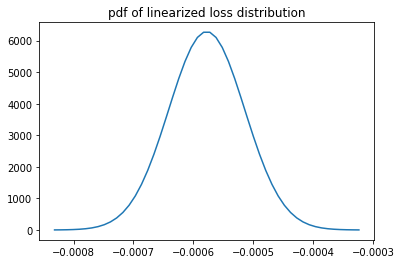

In [0]:
x = np.linspace (exp-4*var, exp+4*var)
y = normfun(x, exp, var)
plt.plot(x,y)
plt.title('pdf of linearized loss distribution')


Text(0.5, 1.0, 'cdf of linearized loss distribution')

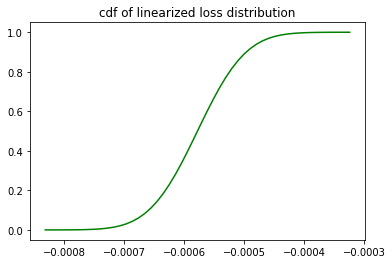

In [0]:
plt.plot(x, norm.cdf (x, exp, var),'g')
plt.title('cdf of linearized loss distribution')

In [0]:
'''
with open('loss.csv') as file:
      reader=csv.reader(file)
      rows=[row[1] for row in reader]
      #print(rows)
      mu_loss=np.mean([float(row) for row in rows[1:1008]] )
      variance=np.var([float(row) for row in rows[1:1008]])
      

In [0]:
#loss distribution
Names=['loss1']
for name in Names:
    with open(name+'.csv') as file:
        reader=csv.reader(file)
        rows=[row for row in reader]
    DApp=[row[1] for row in rows[1:49]]
    DApp=[float(dapp)/100 for dapp in DApp]
   #DApp=[math.log(DApp[i]/DApp[i-1]) for i in range(1,len(DApp))]
    DApp=sorted(DApp)
    DApp=np.array(DApp)
    mu_loss,sigma_loss=norm.fit(DApp)
    #_,p=chisquare(DApp,norm(mu,sigma).pdf(np.linspace(-50,50,251)))
    #print('The p value for '+name+' is %f'%p)
    print(mu_loss,sigma_loss)
    #print(sigma)
    #mu_t,sigma_t,n=t.fit(DApp)


-0.017984855062916666 0.042000145947649926


Text(0.5, 1.0, 'pdf of  loss distribution')

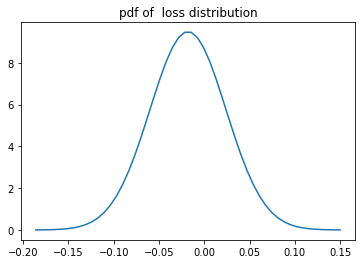

In [0]:
#x_loss = np.arange(-0.002,0.0001,0.00001) 
x_loss=np.linspace (mu_loss-4*sigma_loss, mu_loss+4*sigma_loss)
y_loss = normfun(x_loss, mu_loss, sigma_loss)
plt.plot(x_loss,y_loss)
#plt.hist(DApp,bins=48,density='true')
plt.title('pdf of  loss distribution')

Text(0.5, 1.0, 'cdf of  loss distribution')

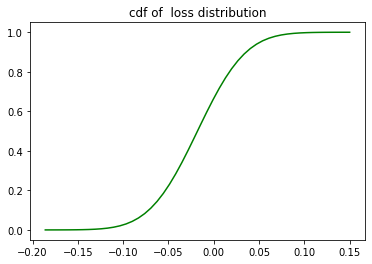

In [0]:
plt.plot(x_loss, norm.cdf (x_loss,mu_loss,sigma_loss),'g')
plt.title('cdf of  loss distribution')

In [0]:
# t-distribution

In [0]:
np.random.seed(1)
ks = t.fit(DApp)
df = ks[0]
#print(df)
loc = ks[1]
#print(loc)
scale = ks[2]
#print(scale)
ks2 = t.rvs(df=df,loc=loc,scale=scale,size=len(DApp))
ss.ks_2samp(DApp,ks2)

14.3850254761902
-0.01806816981166321
0.03905790850349124


Ks_2sampResult(statistic=0.14583333333333334, pvalue=0.6926601395134386)

Text(0.5, 1.0, 'pdf of T-Distribution')

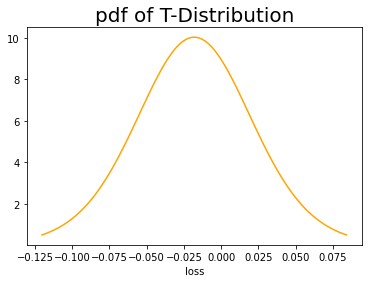

In [0]:
plt.figure()
TDistribution = ss.t(ks[0],ks[1],ks[2])
x = np.linspace(TDistribution.ppf(0.01), TDistribution.ppf(0.99), 100)
plt.plot(x, TDistribution.pdf(x),c='orange')
plt.xlabel('loss')
plt.title('pdf of T-Distribution',size=20)



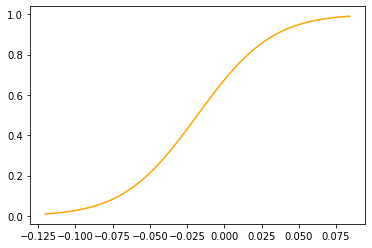

In [0]:
plt.plot(x, TDistribution.cdf(x),c='orange')

In [0]:
#problem3

In [0]:
with open('loss.csv') as file:
      reader=csv.reader(file)
      values=[row[0] for row in reader]
      values_future=[float(row) for row in values[1007:2013]]
      #print(values_future)
      

In [0]:
with open('loss.csv') as file:
      reader=csv.reader(file)
      log_returns=[row[2] for row in reader]
      log_returns_future=[float(row) for row in log_returns[1007:2013]]
      #print(log_returns_future)

No handles with labels found to put in legend.


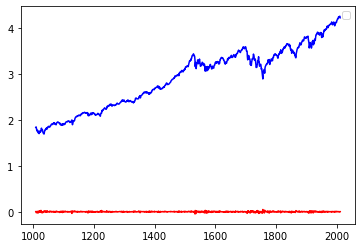

In [0]:
X=np.arange(1008,2013,1)
plt.plot(X,values_future,'b')
plt.plot(X,log_returns_future,'r')
plt.legend()

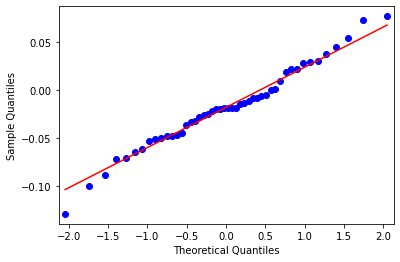

In [0]:

import pylab
sm.qqplot(DApp, line='s')
pylab.show()

TypeError: ignored

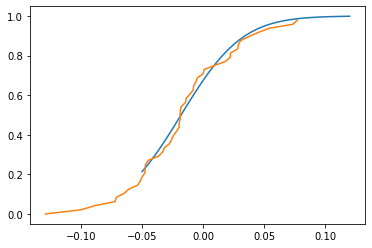

In [0]:
'''
x = np.arange(-0.05, 0.125, 0.005)

y = TDistribution.cdf(x)

plt.plot(x, y)

sorted_ = np.sort(DApp)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

x_label = t.ppf(yvals)
plt.scatter(x_label, sorted_)

ss.probplot(DApp, dist="t", plot=plt)
print('QQ plot for t distribution')
plt.show()

In [0]:
#t-distribution var cvar

In [0]:
'''
price_0= getData(0)[2]
s=np.array(price_0)[:,0] #20120103 price
lamb=s*1/11 #original shares
print(s)
'''



In [0]:

mu=np.zeros(2)
names=['1','2']
def getData(M):
    Is=[i for i in range(2)]
    Rows=[]
    Price=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
           
            rows=[row[1] for row in reader]
        mu[i]=np.mean([float(row) for row in rows[3*M+1:3*M+4]])
        Rows.append([float(row) for row in rows[3*M+1:3*M+4]])
        
    Omega=np.cov(np.array(Rows))
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            price=[row[0] for row in reader]       
        Price.append([float(row) for row in price[3*M+1:3*M+4]])
    
    return mu,Omega,Price

    '''

In [0]:
'''
for M in range(3):
  data= getData(M)
  mu=data[0]
  omega=data[1]
  price=data[2]
  vt=np.dot(lamb,array(price)[:,2])
  wt=np.ones(2)*1/11
''' 

In [0]:
mu=np.zeros(11)
names=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT']
def getData1(M):
    Is=[i for i in range(11)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu[i]=np.mean([float(row) for row in rows[1+21*M:1006+21*M]])
        Rows.append([float(row) for row in rows[1+21*M:1006+21*M]])
    Omega=np.cov(np.array(Rows))
    return mu,Omega

In [0]:
#A=getData1(0)
#A[0]

for M in range(48):
  data= getData1(M+1)
  mu=data[0]
  omega=data[1]
  vt=values_future[M]
  a=lin_loss(vt,wt,mu,omega)
  #print(a[0])
  print(a[1])

In [0]:
values_future[0]

1.842852594